## Ridge, Lasso & ElasticNet Regression Project

### Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/Algerian_forest_fires_dataset_UPDATE.csv', header=1)

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning

In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### The Dataset is divided for two Regions

- Bejaia Region
- Sidi-Bel Abbes Region

In [6]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [7]:
df['Region'] = df['Region'].astype(int)

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df = df.dropna().reset_index(drop=True)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
df = df.drop(122).reset_index(drop=True)

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
# Removing whitespaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
# Changing column dtypes to int and float
to_integer = ['day','month','year','Temperature','RH','Ws']
to_float = ['Rain','FFMC','DMC','DC','ISI','BUI','FWI']

for col in to_integer:
    df[col] = df[col].astype(int)

for col in to_float:
    df[col] = df[col].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [18]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [19]:
df.to_csv('Datasets/Algerian_forest_fires_dataset_Cleaned.csv',index=False)

### Exploratory Data Analysis

In [20]:
df_copy = df.drop(['day','month','year'],axis=1)

In [21]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [22]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


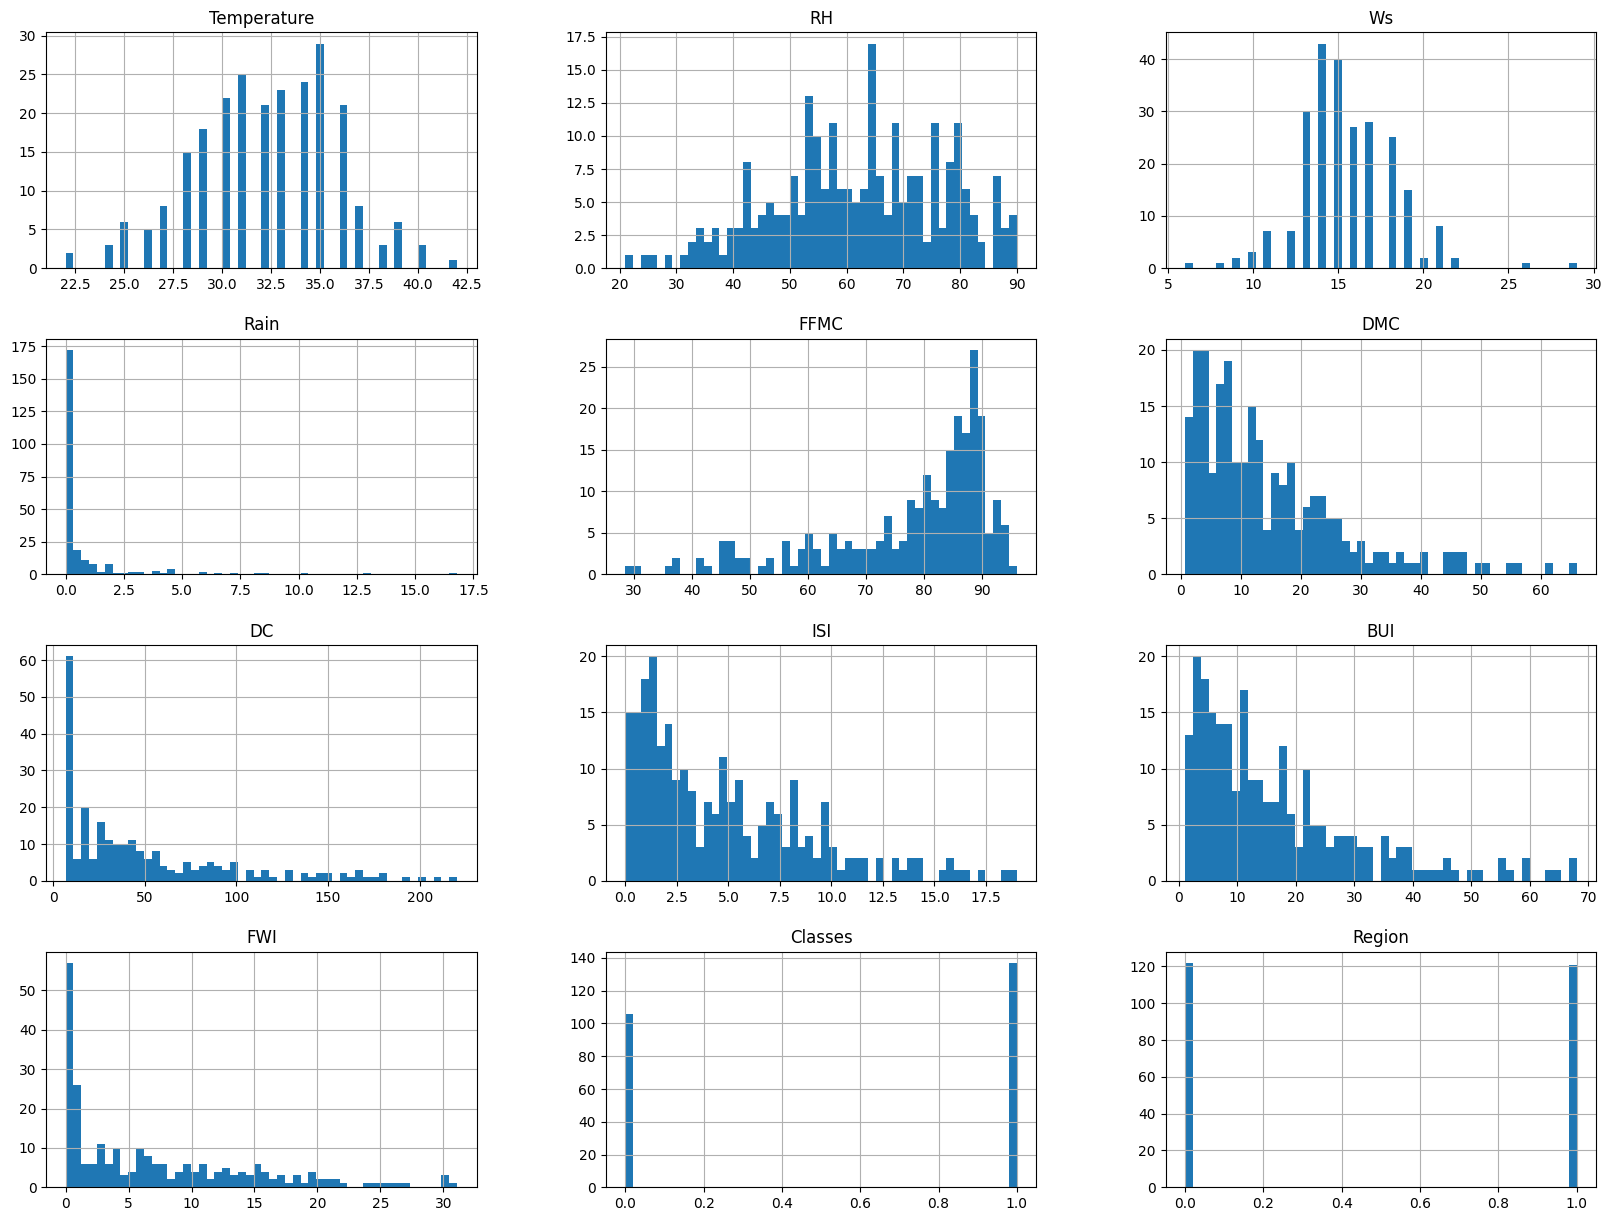

In [23]:
# Density Plot
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [24]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

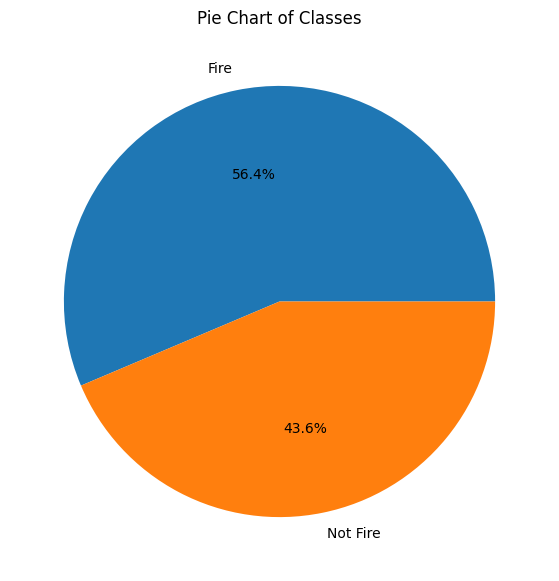

In [25]:
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

<Axes: >

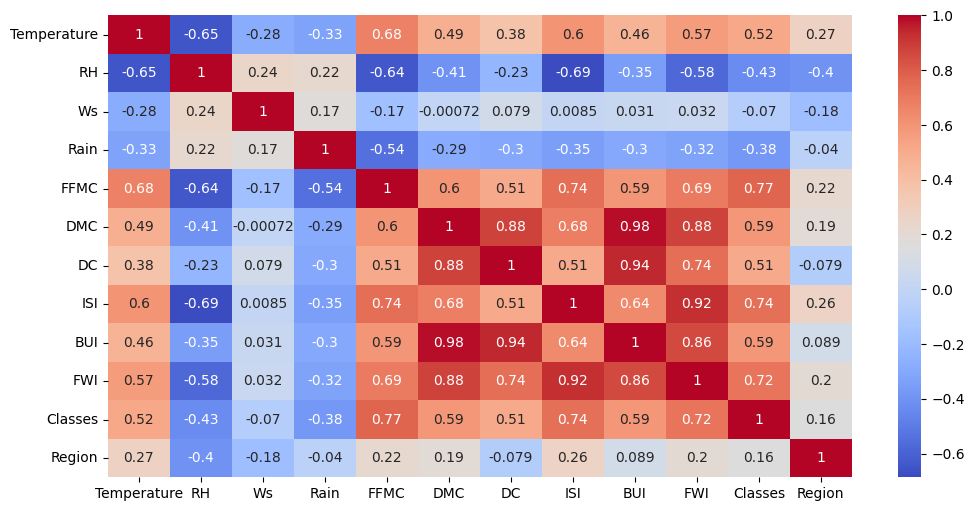

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm')

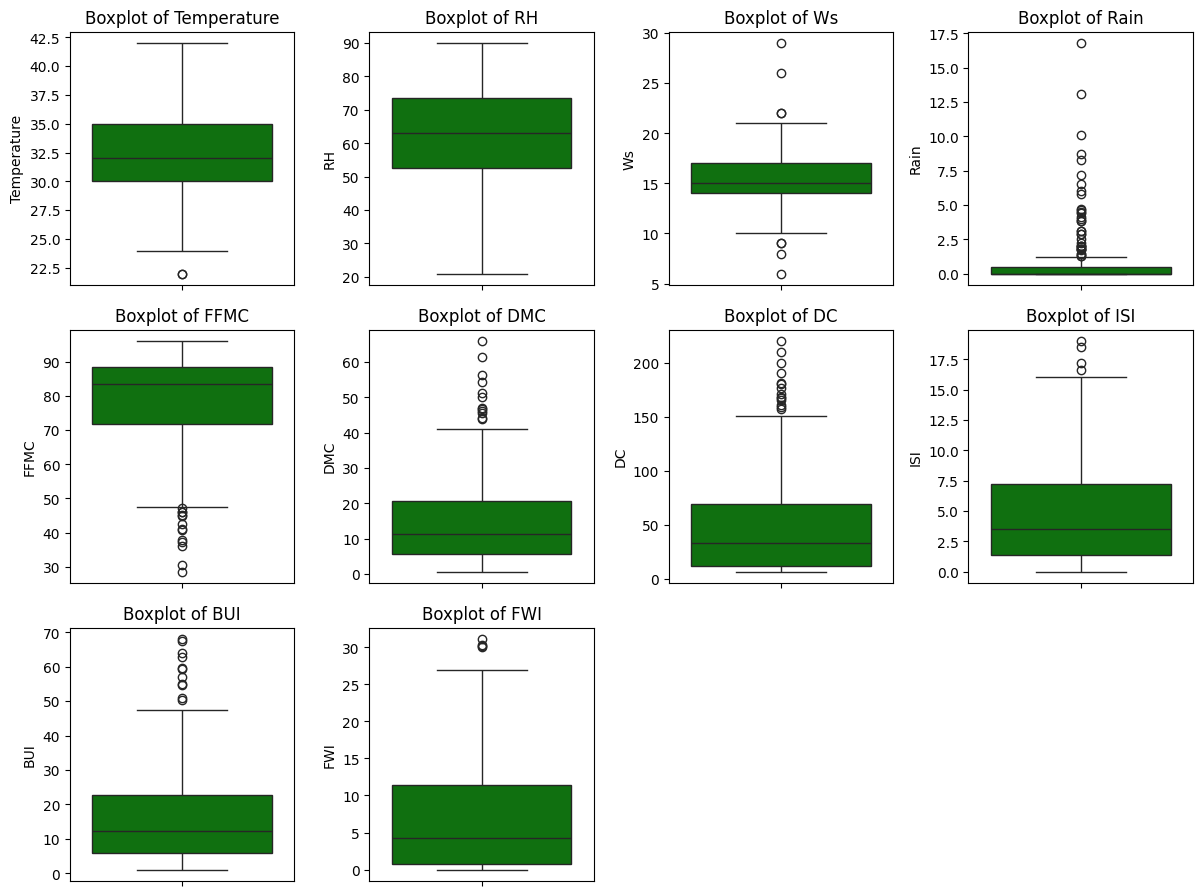

In [27]:
columns = [features for features in df.columns if features not in ['day','month','year','Classes','Region']]
plt.figure(figsize=(12,12))
for i,col in enumerate(columns,1):
    plt.subplot(4,4,i)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    sns.boxplot(df[col],color='green')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

In [28]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

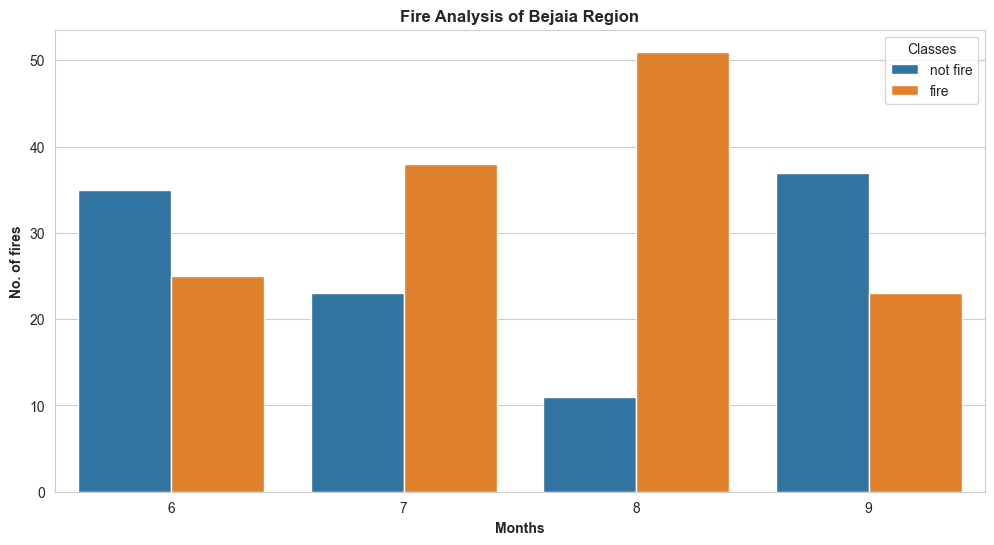

In [29]:
df_temp = df.loc[df['Region']==0]
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('No. of fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('Fire Analysis of Bejaia Region', weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Abbes Region')

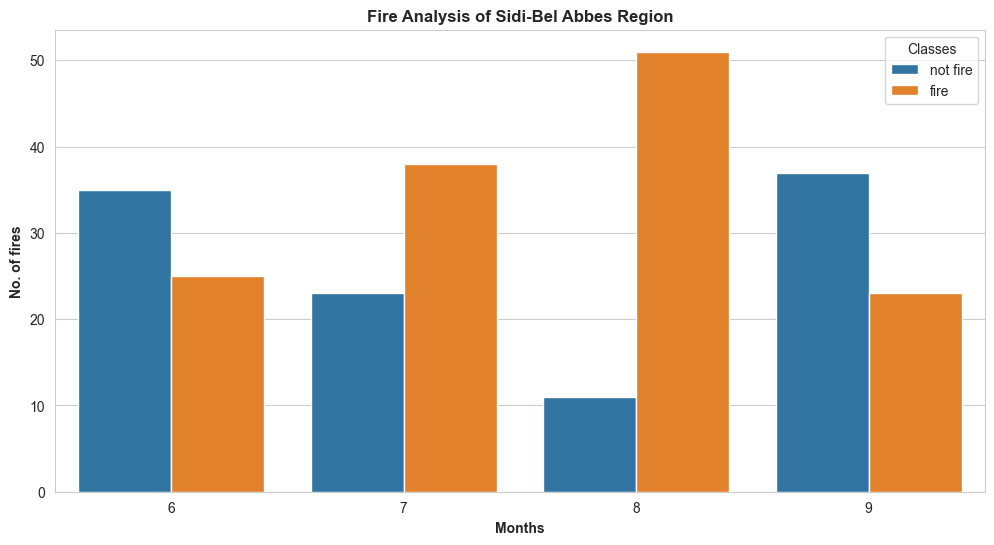

In [30]:
df_temp = df.loc[df['Region']==1]
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('No. of fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('Fire Analysis of Sidi-Bel Abbes Region', weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

### Feature Selection

In [31]:
df = pd.read_csv('Datasets/Algerian_forest_fires_dataset_Cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [32]:
df.drop(['day','month','year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [33]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [34]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [35]:
X = df.drop(['FWI'],axis=1)
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [36]:
y = df['FWI']
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [39]:
y_train.shape, y_test.shape

((182,), (61,))

#### Feature Selection Based on Correlation

In [40]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

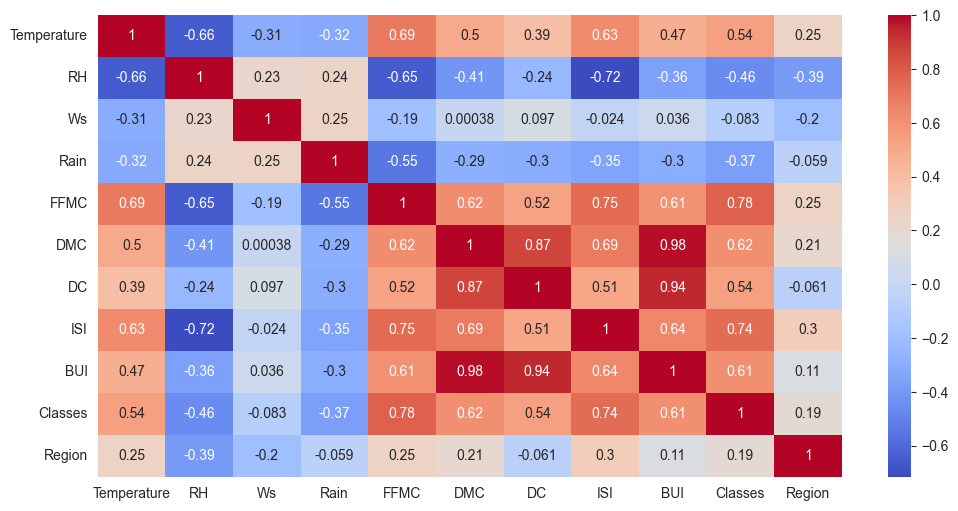

In [41]:
# Checking multicollinearity
plt.figure(figsize=(12,6))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')

In [42]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [43]:
correlation(X_train, 0.85)

{'BUI', 'DC'}

In [44]:
# Dropping the features with corr more than 0.85
X_train.drop(['BUI','DC'],axis=1,inplace=True)
X_test.drop(['BUI','DC'],axis=1,inplace=True)

In [45]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [47]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

Text(0.5, 1.0, 'X Train after scaling')

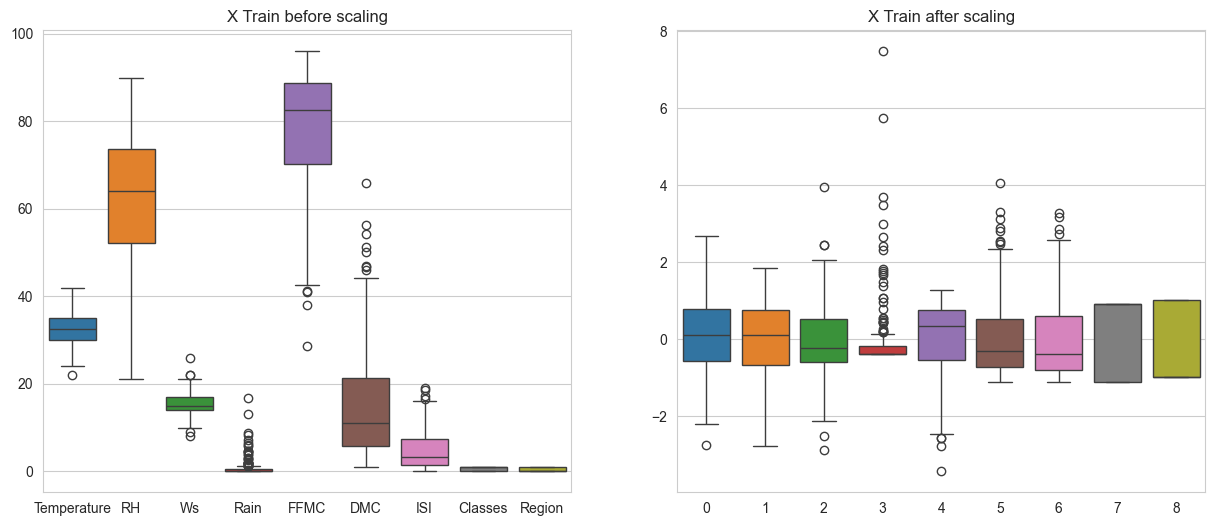

In [48]:
# Boxplot to understand effect of Standard Scaling
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X Train before scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X Train after scaling')

### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [50]:
y_pred = regression.predict(X_test_scaled)
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"Root Mean Squared Error : {rmse}")

Mean Squared Error : 0.674276687379158
Mean Absolute Error : 0.5468236465249978
Root Mean Squared Error : 0.8211435242265253


In [52]:
score = r2_score(y_test, y_pred)

adjusted_r2 = 1 - ((1 - score)*(len(y_test)-1)/(len(y_test) - X_test_scaled.shape[1] - 1))

print(f"R^2 Score : {score*100}")
print(f"Adjusted R^2 Score : {adjusted_r2*100}")

R^2 Score : 98.47657384266951
Adjusted R^2 Score : 98.20773393255237


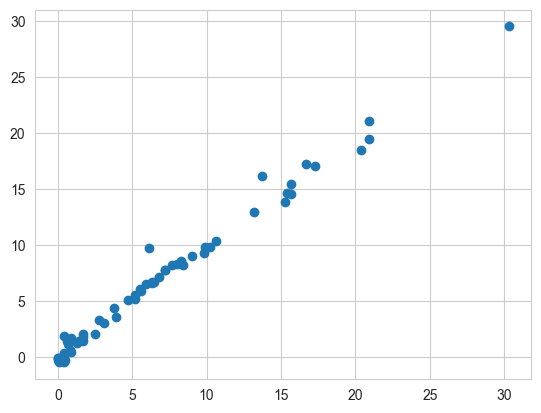

In [53]:
plt.scatter(y_test, y_pred)

### Lasso Regression

Mean Squared Error : 2.2483458918974772
Mean Absolute Error : 1.133175994914409
Root Mean Squared Error : 1.4994485292591664
R^2 Score : 94.92020263112389
Adjusted R^2 Score : 94.02376780132222


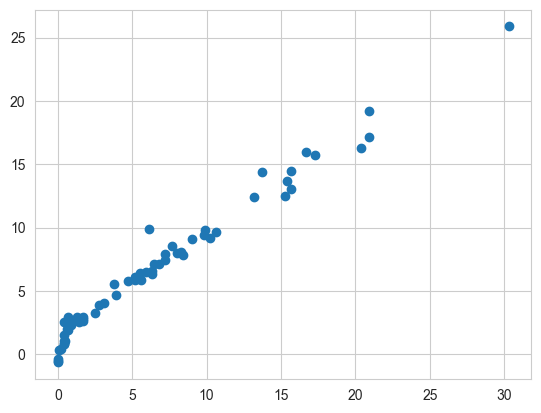

In [54]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"Root Mean Squared Error : {rmse}")

score = r2_score(y_test, y_pred)

adjusted_r2 = 1 - ((1 - score)*(len(y_test)-1)/(len(y_test) - X_test_scaled.shape[1] - 1))

print(f"R^2 Score : {score*100}")
print(f"Adjusted R^2 Score : {adjusted_r2*100}")

plt.scatter(y_test, y_pred)

### Lasso Cross Validation

Mean Squared Error : 0.792499555474362
Mean Absolute Error : 0.619970115826343
Root Mean Squared Error : 0.8902244410677355
R^2 Score : 98.20946715928275
Adjusted R^2 Score : 97.89349077562677


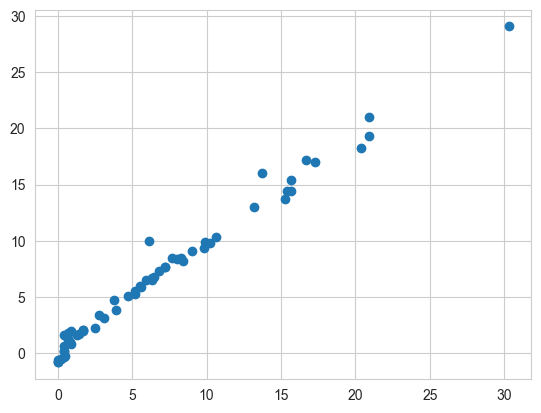

In [55]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

y_pred = lassocv.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"Root Mean Squared Error : {rmse}")

score = r2_score(y_test, y_pred)

adjusted_r2 = 1 - ((1 - score)*(len(y_test)-1)/(len(y_test) - X_test_scaled.shape[1] - 1))

print(f"R^2 Score : {score*100}")
print(f"Adjusted R^2 Score : {adjusted_r2*100}")

plt.scatter(y_test, y_pred)

In [56]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [57]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [58]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

### Ridge Regression

Mean Squared Error : 0.6949198918152096
Mean Absolute Error : 0.5642305340105715
Root Mean Squared Error : 0.8336185529456561
R^2 Score : 98.42993364555512
Adjusted R^2 Score : 98.15286311241779


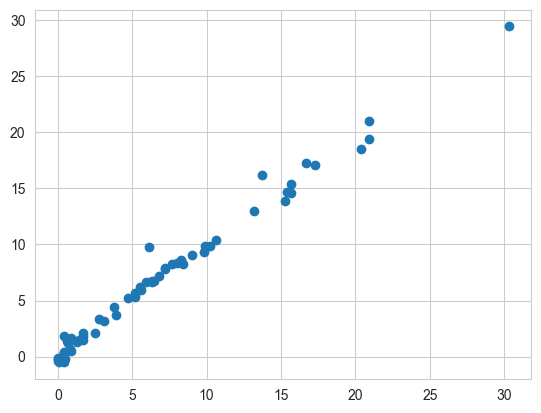

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"Root Mean Squared Error : {rmse}")

score = r2_score(y_test, y_pred)

adjusted_r2 = 1 - ((1 - score)*(len(y_test)-1)/(len(y_test) - X_test_scaled.shape[1] - 1))

print(f"R^2 Score : {score*100}")
print(f"Adjusted R^2 Score : {adjusted_r2*100}")

plt.scatter(y_test, y_pred)

### Ridge Cross Validation

Mean Squared Error : 0.6949198918152096
Mean Absolute Error : 0.5642305340105715
Root Mean Squared Error : 0.8336185529456561
R^2 Score : 98.42993364555512
Adjusted R^2 Score : 98.15286311241779


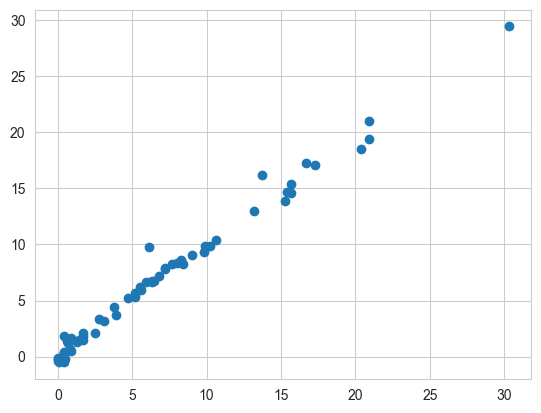

In [60]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)

y_pred = ridgecv.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"Root Mean Squared Error : {rmse}")

score = r2_score(y_test, y_pred)

adjusted_r2 = 1 - ((1 - score)*(len(y_test)-1)/(len(y_test) - X_test_scaled.shape[1] - 1))

print(f"R^2 Score : {score*100}")
print(f"Adjusted R^2 Score : {adjusted_r2*100}")

plt.scatter(y_test, y_pred)

In [61]:
ridgecv.alpha_

np.float64(1.0)

In [62]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [63]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

### ElasticNet Regression

Mean Squared Error : 5.5172511010252245
Mean Absolute Error : 1.8822353634896005
Root Mean Squared Error : 2.3488829474933874
R^2 Score : 87.53460589519703
Adjusted R^2 Score : 85.33483046493768


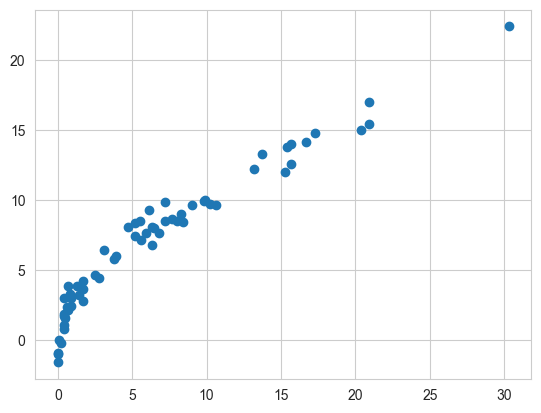

In [64]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)

y_pred = elasticnet.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"Root Mean Squared Error : {rmse}")

score = r2_score(y_test, y_pred)

adjusted_r2 = 1 - ((1 - score)*(len(y_test)-1)/(len(y_test) - X_test_scaled.shape[1] - 1))

print(f"R^2 Score : {score*100}")
print(f"Adjusted R^2 Score : {adjusted_r2*100}")

plt.scatter(y_test, y_pred)

### ElasticNet Cross Validation

Mean Squared Error : 0.8222830416276258
Mean Absolute Error : 0.6575946731430898
Root Mean Squared Error : 0.906798236449336
R^2 Score : 98.14217587854941
Adjusted R^2 Score : 97.8143245629993


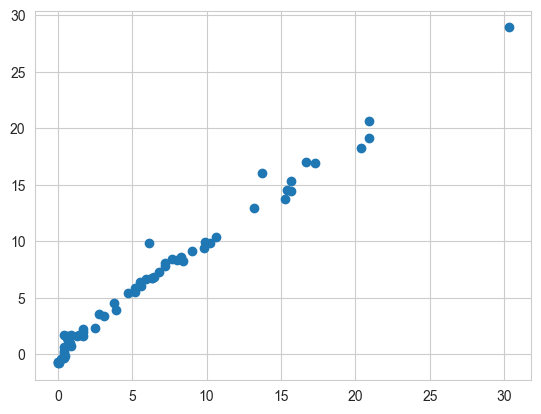

In [65]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)

y_pred = elasticnetcv.predict(X_test_scaled)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"Root Mean Squared Error : {rmse}")

score = r2_score(y_test, y_pred)

adjusted_r2 = 1 - ((1 - score)*(len(y_test)-1)/(len(y_test) - X_test_scaled.shape[1] - 1))

print(f"R^2 Score : {score*100}")
print(f"Adjusted R^2 Score : {adjusted_r2*100}")

plt.scatter(y_test, y_pred)

In [66]:
elasticnetcv.alpha_

np.float64(0.04311146156383891)

In [67]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [68]:
elasticnetcv.mse_path_

array([[53.99690233, 65.39074075, 54.89628985, 77.90299066, 43.34226941],
       [52.57580575, 64.62234745, 53.744793  , 77.60921421, 42.30310502],
       [51.11104709, 62.99703302, 52.17649022, 76.53887034, 41.00613837],
       [49.61037668, 61.26183674, 50.57039748, 74.67053859, 39.67994098],
       [48.07677137, 59.48562789, 48.86189586, 72.53190776, 38.32743244],
       [46.08919463, 57.21227804, 46.85067587, 69.99343362, 36.64273851],
       [43.93304229, 54.81307   , 44.65826477, 67.19431714, 34.65787048],
       [41.80546452, 52.43573064, 42.39238637, 64.39190172, 32.6541552 ],
       [39.71309973, 50.06862734, 40.16732063, 61.6188179 , 30.67748611],
       [37.63649808, 47.60730813, 37.96880498, 58.88319233, 28.76304656],
       [35.48905272, 45.2114555 , 35.74224936, 56.09403417, 26.91571606],
       [33.36370035, 42.89274496, 33.46771793, 53.24006353, 25.13971517],
       [31.29021796, 40.65450553, 31.2980323 , 50.46056554, 23.40823907],
       [29.31299261, 38.49931979, 29.2

In [69]:
elasticnetcv.get_params()

{'alphas': 'warn',
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 'deprecated',
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

### Pickle the ML Models and Standard Scaler Model

##### Pickling only the Ridge Regression Model as it has the highest accuracy of all

In [70]:
import pickle
pickle.dump(scaler, open('Models/scaler.pkl','wb'))
pickle.dump(ridge, open('Models/ridge.pkl','wb'))